# Aviation Accident Analysis

# Business Understanding

The company is planning to diversify by purchasing and operating airplanes for commercial and private enterprises. The Head of Aviation has little knowledge of the risk it imposes and will use the insights from this analysis to decide which aircraft to purchase. I will analyze a dataset from the National Transportation Safety Board to determine the safety of plane types and provide multiple suggestions 
to the Head of Aviation.

# Data Understanding

The dataset is provided by the National Transportation Safety Board. It includes civil aviation accidents and other selected incidents from 1962 to 2023. This step is focused on understanding what is in the dataset so it can be further analyzed to answer the business question.

Each record of this dataset represents an aviation accident, marked by the "Event ID", with information about the plane (make, model, etc.) and the severity of the accident (# of injuries).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#import aviation and us stat code csv files
aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')
us_state_df = pd.read_csv('./data/USState_Codes.csv', encoding='latin-1')

/var/folders/sk/8hr8rsms4cb5y3ryy9w5yplh0000gn/T/ipykernel_13228/3088602378.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [3]:
#Print first few rows of the dataframe
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Print the shape of aviation_df
aviation_df.shape

(88889, 31)

In [5]:
#Print what data type is in each column
aviation_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
#print general information of aviation_df
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#Print the percentage of data missing in each column
round(aviation_df.isna().sum()/ aviation_df.shape[0] * 100, 1)

Event.Id                   0.0
Investigation.Type         0.0
Accident.Number            0.0
Event.Date                 0.0
Location                   0.1
Country                    0.3
Latitude                  61.3
Longitude                 61.3
Airport.Code              43.6
Airport.Name              40.7
Injury.Severity            1.1
Aircraft.damage            3.6
Aircraft.Category         63.7
Registration.Number        1.6
Make                       0.1
Model                      0.1
Amateur.Built              0.1
Number.of.Engines          6.8
Engine.Type                8.0
FAR.Description           64.0
Schedule                  85.8
Purpose.of.flight          7.0
Air.carrier               81.3
Total.Fatal.Injuries      12.8
Total.Serious.Injuries    14.1
Total.Minor.Injuries      13.4
Total.Uninjured            6.7
Weather.Condition          5.1
Broad.phase.of.flight     30.6
Report.Status              7.2
Publication.Date          15.5
dtype: float64

There are multiple columns with over 50% of it is missing data. The Latitude, Longitude, Aircraft Category, FAR Description, Schedule and Air Carrier columns may not be useful to use in this analysis due to the large amount of missing data. '

The injuries columns contain the important data. Less than 15% of the incidents are missing injury data, so it will be useful to remove those rows from the dataset. 

In [8]:
#Check different Make of Airplanes
aviation_df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [9]:
#Check different phases of flight when accident occured
aviation_df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [10]:
#Check for duplicats in the dataframe
aviation_df[aviation_df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [11]:
#Checking for any extraneous values that may be used to replace missing data
for col in aviation_df.columns:
    print(col, '\n', aviation_df[col].value_counts(normalize=True).head(), '\n\n')

Event.Id 
 Event.Id
20001212X19172    0.000034
20001214X45071    0.000034
20220730105623    0.000022
20051213X01965    0.000022
20001212X16765    0.000022
Name: proportion, dtype: float64 


Investigation.Type 
 Investigation.Type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64 


Accident.Number 
 Accident.Number
CEN22LA149    0.000022
WPR23LA041    0.000022
WPR23LA045    0.000022
DCA22WA214    0.000022
DCA22WA089    0.000022
Name: proportion, dtype: float64 


Event.Date 
 Event.Date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
Name: proportion, dtype: float64 


Location 
 Location
ANCHORAGE, AK      0.004885
MIAMI, FL          0.002251
ALBUQUERQUE, NM    0.002206
HOUSTON, TX        0.002173
CHICAGO, IL        0.002071
Name: proportion, dtype: float64 


Country 
 Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Ki

## Data Preparation

The aviation data set needs to be cleaned and organized so that the analysis will produce clear and accurate results. This includes dropping unnecessary columns from the dataset, dropping appropriate rows, and reformatting data. 

The "Make" column needs to be normalized, so there are no repeat values with different formats.



In [12]:
#Normalize "Make" Column Data
aviation_df['Make'] = aviation_df['Make'].str.lower().str.title()

In [13]:
#Reformat Column Names to remove periods between words
aviation_df.columns = aviation_df.columns.str.replace('.', ' ').str.title()

The dataset includes incidents from 60 years ago, but this date range is too far back. Accidents from the 60's and 70's are interesting to know about, but those types of planes will not be purchased due to the age of the planes. The dataset will be sorted to only include incidents within the past 30 years to have a better understanding of the safety of current planes.

In [14]:
#Convert Event Date to datetime object
aviation_df['Event Date'] = pd.to_datetime(aviation_df['Event Date'])

recent_aviation_df = aviation_df[aviation_df['Event Date'] > '1993-01-01'].reset_index()

In [15]:
recent_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56858 entries, 0 to 56857
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   56858 non-null  int64         
 1   Event Id                56858 non-null  object        
 2   Investigation Type      56858 non-null  object        
 3   Accident Number         56858 non-null  object        
 4   Event Date              56858 non-null  datetime64[ns]
 5   Location                56817 non-null  object        
 6   Country                 56785 non-null  object        
 7   Latitude                34373 non-null  object        
 8   Longitude               34364 non-null  object        
 9   Airport Code            33300 non-null  object        
 10  Airport Name            34080 non-null  object        
 11  Injury Severity         55858 non-null  object        
 12  Aircraft Damage         54360 non-null  object

In [16]:
#Remove rows with missing data on injuries
recent_aviation_df.dropna(axis = 0, subset = ['Total Fatal Injuries', 'Total Serious Injuries',\
                                              'Total Minor Injuries', 'Total Uninjured'],\
                                    inplace = True)


In [17]:
#Create new column with Make and Model data
recent_aviation_df['Make/Model'] = recent_aviation_df['Make'] + ' - ' + recent_aviation_df['Model']
recent_aviation_df['Make/Model'].value_counts()[0:30]

Make/Model
Cessna - 172                            978
Cessna - 152                            791
Cessna - 172N                           480
Boeing - 737                            474
Cessna - 182                            367
Piper - PA-28-140                       354
Cessna - 172M                           343
Cessna - 150                            310
Cessna - 180                            298
Piper - PA28                            278
Piper - PA-18-150                       271
Cessna - 172P                           263
Cessna - 150M                           224
Piper - PA-28-180                       220
Beech - A36                             216
Bell - 206B                             216
Piper - PA-18                           214
Robinson - R44                          211
Cessna - 172S                           203
Piper - PA-28-161                       202
Cessna - 140                            199
Piper - PA-28-181                       195
Cessna - 170B        

In [18]:
#Count Number of Engines as percentage of incidents in dataframe
recent_aviation_df['Number Of Engines'].value_counts(normalize = True)

Number Of Engines
1.0    0.847892
2.0    0.134067
0.0    0.009767
4.0    0.004635
3.0    0.003535
8.0    0.000079
6.0    0.000026
Name: proportion, dtype: float64

In [19]:
#Ignore planes with one engine or less as they account for 85% of all incidents. 
#Create a new dataframe with airplanes that have 2 or more engines.
big_aircraft_df = recent_aviation_df[recent_aviation_df['Number Of Engines'] >= 2].reset_index()

In [20]:
#Create column with only Year of incident
big_aircraft_df['Year'] = [year.strftime("%Y") for year in big_aircraft_df['Event Date']]
big_aircraft_df['Year'].value_counts()

Year
1995    336
1993    329
1996    312
2010    303
1997    300
1998    292
1999    290
1994    285
2000    283
2008    266
2011    263
2009    241
2012    222
2019    191
2013    185
2017    185
2018    184
2016    179
2014    166
2022    160
2015    157
2021    149
2020    132
2007     18
2005      7
2002      1
Name: count, dtype: int64

# Exploratory Data Analysis

In [21]:
#Create two separate dataframes with small and large airplanes
large_planes = big_aircraft_df[(big_aircraft_df['Make'] == 'Boeing') | (big_aircraft_df['Make'] == 'Airbus')]
small_planes = big_aircraft_df[(big_aircraft_df['Make'] == 'Cessna') | (big_aircraft_df['Make'] == 'Piper') \
                                                                     | (big_aircraft_df['Make'] == 'Beech')]

In [22]:
#Group by Make/Model to get average fatality and injury rates. 
large_planes_injuries = large_planes.groupby('Make/Model')\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg('mean')
large_planes_injuries['Total Number of Incidents'] = large_planes['Make/Model'].value_counts()
top_large_planes_injuries = large_planes_injuries.sort_values('Total Number of Incidents', ascending = False)[0:10]

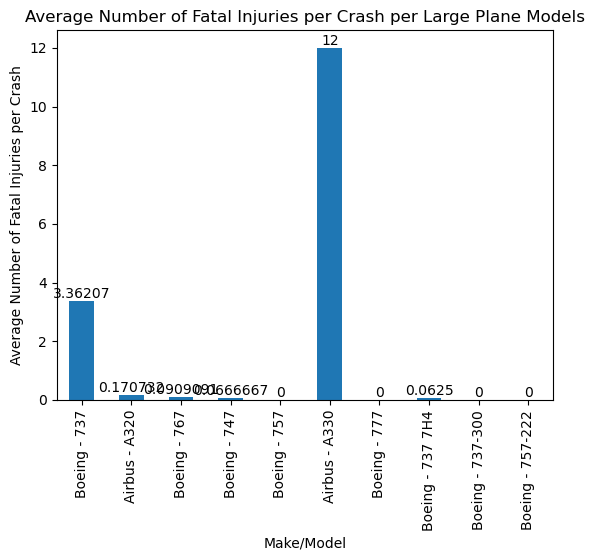

In [23]:
#Plot average number of fatal injuries.
ax = top_large_planes_injuries.plot.bar(y=('Total Fatal Injuries'),\
                     legend = False,\
                     xlabel = 'Make/Model',\
                     ylabel = 'Average Number of Fatal Injuries per Crash',\
                     title = 'Average Number of Fatal Injuries per Crash per Large Plane Models',\
                     )
ax.bar_label(ax.containers[0]);

In [24]:
#Group by Make/Model to get average fatality and injury rates. 
small_planes_injuries = small_planes.groupby('Make/Model')\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg('mean')
small_planes_injuries['Total Number of Incidents'] = small_planes['Make/Model'].value_counts()
top_small_planes_injuries = small_planes_injuries.sort_values('Total Number of Incidents', ascending = False)[0:30]

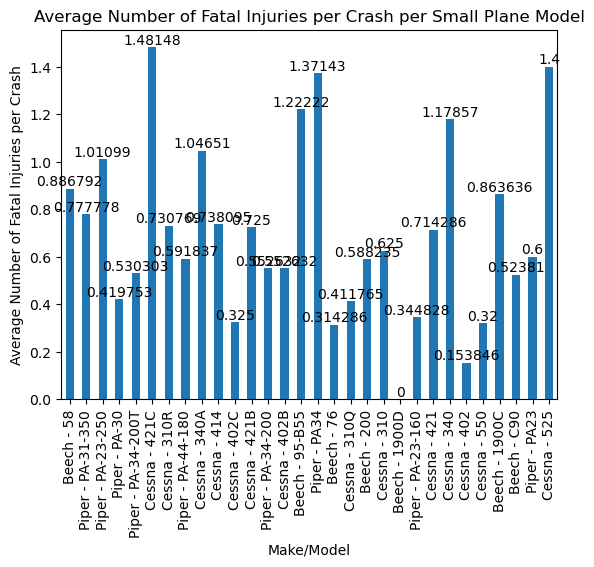

In [25]:
#Plot average number of fatal injuries.
ax = top_small_planes_injuries.plot.bar(y=('Total Fatal Injuries'),\
                     legend = False,\
                     xlabel = 'Make/Model',\
                     ylabel = 'Average Number of Fatal Injuries per Crash',\
                     title = 'Average Number of Fatal Injuries per Crash per Small Plane Model',\
                     )
ax.bar_label(ax.containers[0]);

In [38]:
boeing = large_planes[large_planes['Make'] == 'Boeing']
airbus = large_planes[large_planes['Make'] == 'Airbus']
cessna = small_planes[small_planes['Make'] == 'Cessna']
beech = small_planes[small_planes['Make'] == 'Beech']
piper = small_planes[small_planes['Make'] == 'Piper']

In [39]:
boeing_crashes_yr = boeing.value_counts('Year').sort_index()
airbus_crashes_yr = airbus.value_counts('Year').sort_index()
cessna_crashes_yr = cessna.value_counts('Year').sort_index()
beech_crashes_yr = beech.value_counts('Year').sort_index()
piper_crashes_yr = piper.value_counts('Year').sort_index()



In [40]:
crashes_yr = pd.concat([boeing_crashes_yr, airbus_crashes_yr, cessna_crashes_yr,beech_crashes_yr,piper_crashes_yr],axis = 0)
crashes_yr

Year
1993    32
1994    23
1995    40
1996    36
1997    34
        ..
2018    27
2019    25
2020    21
2021    21
2022    18
Name: count, Length: 112, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


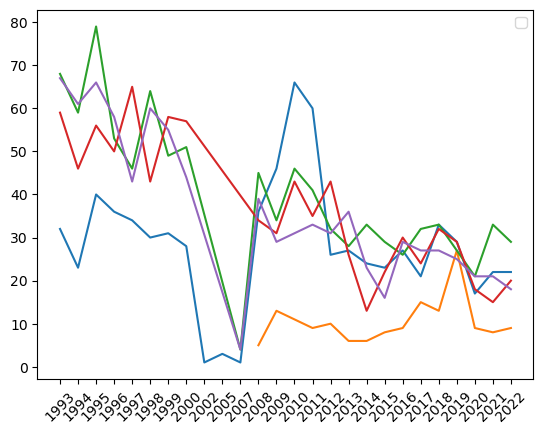

In [44]:
plt.plot(boeing_crashes_yr)
plt.plot(airbus_crashes_yr)
plt.plot(cessna_crashes_yr)
plt.plot(beech_crashes_yr)
plt.plot(piper_crashes_yr)
plt.xticks(rotation=45);

# Conclusion

The analysis leads to the following three recommendations for the Head of Aviation:

  1) Since 1923, approximately 85% of airplane incidents are planes with single engines, therefore I recommend only considering air crafts with 2 or more engines.
  2) For large planes that can service commercial flights, the Boeing 757 and Airbus A319 have had zero deaths. For small planes that can service more private flights and smaller commercial flights, the Beech 1900D and Cessna 402 have the lowest fatality rate.
  3) 

## Limitations

## Recommendations 

## Next Steps

Study financial cost of owning/operting these planes. What are the maintencance costs? What is profitabiity?